## Import Dependency

In [66]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Data Acquisition

In [2]:
df = pd.read_csv(r"C:\Users\nene0\Desktop\Projects\kaggle_Used_Car_Regression\playground-series-s4e9\train.csv")

df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


- Target: `price`

|Feature|Type|Feature|Type|Feature|Type|Feature|Type|
|--------|------|--------|------|--------|------|--------|------|
|`id`|Alpha Numeric|`brand`|Categorical - Nominal|`model`|Categorical - Nominal|`model_year`|Numeric - Discrete|
|`milage`|Numeric - Continuous|`fuel_type`|Categorical - Nominal|`engine`|Categorical - Nominal|`transmission`|Categorical - Nominal|
|`ext_col`|Categorical - Nominal|`int_col`|Categorical - Nominal|`accident`|Categorical - Ordinal|`clean_title`|Categorical - Nominal|

In [4]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


## Data Cleaning

In [5]:
missing_values = df.isna().sum()

for column, values in missing_values.items():
    if values > 0:
        print(f"{column}: {values}")

fuel_type: 5083
accident: 2452
clean_title: 21419


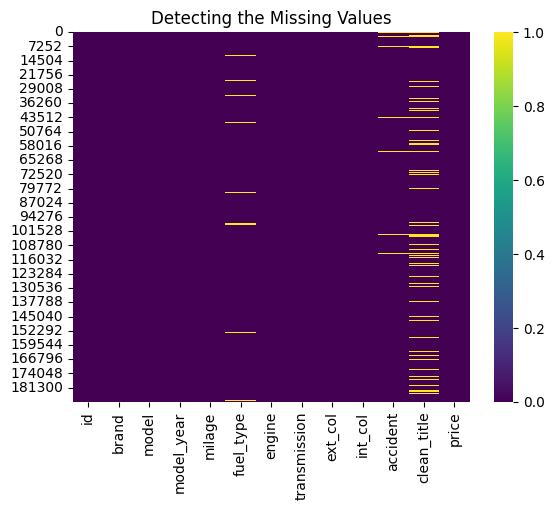

In [6]:
sns.heatmap(df.isna(), cmap='viridis')
plt.title('Detecting the Missing Values')

plt.show()

### Duplicated Value

In [7]:
df['id'].duplicated().sum()

0

In [8]:
df.drop(columns='id', inplace=True)

The `id` column is exactly same as the index, therefore we will drop right away.

### Missing Values

#### fuel_type

In [9]:
df[df['fuel_type'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
11,Tesla,Model S P100D,2015,81500,NaN,Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,19000
32,Tesla,Model S P100D,2018,30300,NaN,518.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes,64000
51,Tesla,Model 3 Long Range,2020,38360,NaN,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
52,Tesla,Model X 75D,2021,88000,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,Black,Black,None reported,Yes,53600
161,Tesla,Model S Long Range,2021,9500,NaN,670.0HP Electric Motor Electric Fuel System,A/T,White,Beige,None reported,Yes,89999
...,...,...,...,...,...,...,...,...,...,...,...,...
188368,Ford,Mustang Mach-E Premium,2022,2058,NaN,Standard Range Battery,Automatic CVT,Red,Black,None reported,NaN,27785
188455,Ford,Mustang Mach-E GT,2022,8000,NaN,480.0HP Electric Motor Electric Fuel System,A/T,Orange,White,None reported,Yes,115000
188462,Ford,Mustang Mach-E GT,2023,9000,NaN,480.0HP Electric Motor Electric Fuel System,A/T,Orange,Black,None reported,Yes,85000
188484,Ford,Model X P100D,2018,52000,NaN,534.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,Black,None reported,Yes,45000


In [10]:
df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

We see there are some values that we need to look over which are '-' and 'not supported' along with the missing values. There seems like a pattern where all the missing values are an electric cars.

In [11]:
df[df['brand'] == 'Tesla'] # Tesla don't make Gasoline car so there is a wrong value.

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
11,Tesla,Model S P100D,2015,81500,NaN,Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,19000
32,Tesla,Model S P100D,2018,30300,NaN,518.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes,64000
51,Tesla,Model 3 Long Range,2020,38360,NaN,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
52,Tesla,Model X 75D,2021,88000,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,Black,Black,None reported,Yes,53600
161,Tesla,Model S Long Range,2021,9500,NaN,670.0HP Electric Motor Electric Fuel System,A/T,White,Beige,None reported,Yes,89999
...,...,...,...,...,...,...,...,...,...,...,...,...
188231,Tesla,Model 3 Performance,2021,23250,NaN,455.0HP Electric Motor Electric Fuel System,1-Speed A/T,Silver,White,None reported,Yes,29000
188302,Tesla,Model Y Performance,2022,13500,NaN,455.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,70000
188339,Tesla,Model S 100D,2018,28333,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,Silver,Black,At least 1 accident or damage reported,Yes,49999
188380,Tesla,Model S Performance,2021,10500,Gasoline,778.0HP Electric Motor Electric Fuel System,8-Speed A/T,Black,Beige,None reported,Yes,98900


In [12]:
df[df['brand'] == 'Rivian'] # Rivian also don't make Gasoline car so there is a wrong value.

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
44,Rivian,R1S Adventure Package,2023,7000,Gasoline,835.0HP Electric Motor Electric Fuel System,8-Speed A/T,Green,Black,None reported,Yes,145000
902,Rivian,R1S Adventure Package,2023,8400,NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,93000
982,Rivian,R1S Adventure Package,2021,28200,NaN,835.0HP Electric Motor Electric Fuel System,A/T,Silver,White,None reported,Yes,29600
1561,Rivian,R1S Adventure Package,2023,12500,NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,Silver,Black,None reported,Yes,19395
2694,Rivian,R1S Adventure Package,2023,17500,–,–,A/T,Gray,Black,None reported,Yes,133500
...,...,...,...,...,...,...,...,...,...,...,...,...
187913,Rivian,R1S Adventure Package,2023,2700,NaN,835.0HP Electric Motor Electric Fuel System,A/T,Black,White,None reported,Yes,92500
188025,Rivian,R1S Launch Edition,2022,8681,NaN,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,Green,None reported,Yes,87500
188112,Rivian,R1S Adventure Package,2023,2000,NaN,835.0HP Electric Motor Electric Fuel System,A/T,Black,Gray,None reported,Yes,89000
188248,Rivian,R1S Launch Edition,2022,2525,Gasoline,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,Orange,White,None reported,Yes,81500


In [13]:
df[df['brand'] == 'Lucid'] # Lucid also don't make Gasoline car so there is a wrong value.

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2256,Lucid,Air Grand Touring,2007,156875,Gasoline,262.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Red,Black,None reported,Yes,9499
5141,Lucid,Air Grand Touring,2022,51000,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,120990
6272,Lucid,Air Grand Touring,2022,11111,Gasoline,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,63000
9523,Lucid,Air Grand Touring,2023,3552,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,None reported,Yes,53900
10153,Lucid,Air Grand Touring,2021,14550,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,None reported,Yes,33333
...,...,...,...,...,...,...,...,...,...,...,...,...
179328,Lucid,Air Grand Touring,2022,4786,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,90000
179556,Lucid,Air Grand Touring,2021,33012,NaN,355.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,Beige,None reported,Yes,42000
180801,Lucid,Air Grand Touring,2023,7900,NaN,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,–,None reported,Yes,82500
181188,Lucid,Air Grand Touring,2011,52500,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Green,Beige,None reported,Yes,28000


In [14]:
electric_brands = ['Tesla', 'Lucid', 'Rivian']

# Fill in the 'fuel_type' with 'Electric' if the brand is in the electric_brands list.
df.loc[df['brand'].isin(electric_brands), 'fuel_type'] = 'Electric'

# Fill in missing values or update to the correct value using the 'engine' column.
df.loc[((df['engine'].str.contains('Electric|Battery'))&(df['fuel_type'].isna())), 'fuel_type'] = 'Electric'
df.loc[((df['engine'].str.contains('Hybrid'))&(df['fuel_type'].isna()|(df['fuel_type']=='–'))), 'fuel_type'] = 'Hybrid'
df.loc[((df['engine'].str.contains('Gasoline'))&(df['fuel_type'].isna()|(df['fuel_type']=='not supported')|(df['fuel_type']=='–'))), 'fuel_type'] = 'Gasoline'
df.loc[((df['engine'].str.contains('Diesel'))&(df['fuel_type'].isna())), 'fuel_type'] = 'Diesel'
df.loc[((df['engine'].str.contains('Hydrogen'))&(df['fuel_type']=='not supported')), 'fuel_type'] = 'Hydrogen' # Toyota has a Hydrogen Car!

# Fill in missing values or update to the correct value using the 'model' column.
df.loc[((df['model'].str.contains('EV|Electric'))&(df['fuel_type'].isna())), 'fuel_type'] = 'Electric' # EV = Electric Vehicle

# Rest are all filled with the value 'Gasoline'ArithmeticError
df.loc[((df['fuel_type'].isna())|(df['fuel_type'].str.contains('not supported|–'))), 'fuel_type'] = 'Gasoline'

To simplify the process, I began by filling in missing values for brands that exclusively produce electric cars. Next, I checked the `engine` field and, if it contained terms such as "electric," "battery," "hybrid," "gasoline," "diesel," or "hydrogen," I updated or filled in the corresponding fuel type. If these keywords were missing from the `engine` field, I used the `model` values to fill in the fuel type. Finally, any remaining missing values, including those marked as '-', or 'not supported,' were filled with 'Gasoline,' as gasoline-powered cars are the most common.

In [15]:
df['fuel_type'].isna().sum()

0

#### accident

In [16]:
df[df['accident'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
87,RAM,2500 Big Horn,2012,95400,Diesel,350.0HP 6.7L Straight 6 Cylinder Engine Diesel...,6-Speed A/T,Black,Black,NaN,NaN,27899
134,Jeep,Gladiator Sport,2021,61341,Gasoline,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Firecracker Red Clearcoat,Black,NaN,NaN,32455
164,Acura,RDX w/A-Spec Package,2023,39517,Gasoline,2.0 Liter DOHC Turbo,Automatic,Gray,Black,NaN,NaN,29645
333,Mercedes-Benz,SLK-Class SLK320,2001,170000,Gasoline,215.0HP 3.2L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Black,Beige,NaN,NaN,6000
361,RAM,2500 SLT,2016,69600,Gasoline,410.0HP 6.4L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Gray,NaN,NaN,35900
...,...,...,...,...,...,...,...,...,...,...,...,...
187885,Chevrolet,Corvette Stingray w/2LT,2022,16100,Gasoline,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Blue,NaN,NaN,36000
188140,Chevrolet,Silverado 1500 RST,2021,40929,Gasoline,5.3L V8 16V GDI OHV,10-Speed Automatic,Shadow Gray Metallic,Jet Black,NaN,NaN,41885
188425,Volvo,XC90 T6 Momentum,2016,25000,Gasoline,316.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,NaN,NaN,52500
188505,Ford,F-150 XLT,2020,49899,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,Automatic,Gray,Black,NaN,NaN,52645


In [17]:
df['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [18]:
df['accident'].fillna('Unknown', inplace=True)

Since we don't know if there was an accident or not, we will fill in the value with 'Unknown'.

#### clean_title

In [19]:
df[df['clean_title'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
20,Land,Rover Defender S,2023,7978,Gasoline,5.2L V10 40V PDI DOHC,8-Speed Automatic,Santorini Black Metallic,Black,None reported,NaN,41998
45,RAM,1500 Laramie,2022,27352,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Diamond Black,Black,None reported,NaN,42599
51,Tesla,Model 3 Long Range,2020,38360,Electric,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
60,Mercedes-Benz,GLS 450 Base 4MATIC,2017,44147,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,9-Speed Automatic,White,Parchment.,At least 1 accident or damage reported,NaN,29999
70,McLaren,570S Spider,2023,3254,Gasoline,3.8L V8 32V MPFI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,Vega Blue,Black,None reported,NaN,92500
...,...,...,...,...,...,...,...,...,...,...,...,...
188507,Chevrolet,Corvette Stingray w/3LT,2023,3053,Gasoline,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,Unknown,NaN,61999
188511,Land,Rover Range Rover Velar P380 SE R-Dynamic,2022,15198,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Firenze Red,Ebony,None reported,NaN,23739
188513,Lexus,GS 350 F Sport,2022,82046,Gasoline,3.5L V6 24V PDI DOHC,8-Speed Automatic,Caviar,Black,None reported,NaN,48990
188520,Mercedes-Benz,GLC 300 GLC 300,2022,18031,Gasoline,2.0 Liter Turbo,Automatic,White,Black,None reported,NaN,39998


In [20]:
df['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [21]:
df['clean_title'].fillna('Unknown', inplace=True)

Same thing, we don't know if the car has a clean title or not, we will fill in the value with 'Unknown'.

In [22]:
df.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

### Validating Values

#### Numeric Data

In [23]:
df['model_year'].unique()

array([2007, 2002, 2017, 2021, 2018, 2016, 2020, 2015, 2011, 2013, 2023,
       2019, 2012, 2014, 2008, 2009, 2022, 2003, 2005, 2001, 2006, 2000,
       2010, 2004, 1997, 1998, 1999, 1994, 1993, 1996, 1995, 2024, 1974,
       1992], dtype=int64)

<Axes: >

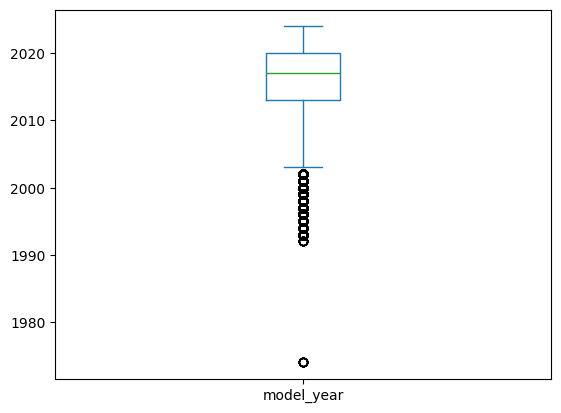

In [24]:
df['model_year'].plot.box()

In [25]:
df['model_year'].min()

1974

In [26]:
df[df['model_year']==1974]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
8173,Dodge,Challenger R/T Scat Pack,1974,49000,Gasoline,–,5-Speed M/T,Green,Gray,None reported,Yes,29900
38565,Ford,Bronco,1974,38012,Gasoline,–,–,Thunder Gray,Dark Gray,None reported,Yes,84620
47488,Ford,Bronco,1974,109762,Gasoline,–,–,Tempest,–,Unknown,Unknown,13046
47837,Ford,Bronco XLT,1974,5856,Gasoline,–,6-Speed M/T,Black,Black,None reported,Yes,115000
55169,Ford,Thunderbird Deluxe,1974,174678,Gasoline,280.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Beige,None reported,Yes,29998
60702,Porsche,911 Carrera 4S,1974,102750,Gasoline,–,A/T,Gray,Gray,None reported,Yes,29000
71389,Ford,Bronco XLT,1974,54323,Gasoline,–,4-Speed A/T,Blue,Beige,None reported,Yes,23500
121193,Ford,Bronco,1974,7900,Gasoline,–,–,Gray,Gray,None reported,Yes,197499
127656,Lincoln,Town Car Base,1974,152000,Gasoline,–,A/T,White,Beige,None reported,Yes,9999
133985,Jaguar,F-PACE S,1974,58356,Gasoline,–,Automatic,Black,Ebony,None reported,Unknown,115998


In [27]:
len(df[df['model_year']==1974])

12

The outlier in the `model_year` is 1974, with 12 records in the dataset. These records are missing both the `engine` and `transmission` values, which will require further investigation. Also, come of the models did not came out in 1974. For example, Porsche's 911 Carerra 4S first came out in 2002.

Google Search result on the band - model first release:
- Dodge Challenger : 2015
- Ford Bronco : 1966
- Ford Thunderbird : 1954
- Porsche 911 : 2002
- Lincoln Town Car : 1959
- Jaguar F-PACE : 2017
- Lamborghini Murcielago : 2002

We need to update the model year for Dodge, Porsche, Jaguar, and Lamborghini.

In [28]:
df[df['model'] == 'Murcielago Base']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2229,Lamborghini,Murcielago Base,2021,2760,Gasoline,571.0HP 6.2L 12 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,108000
4541,Lamborghini,Murcielago Base,2022,3369,Gasoline,6.5L V12 48V MPFI DOHC,8-SPEED AT,Bianco Monocerus,Nero Ade,None reported,Yes,69995
11964,Lamborghini,Murcielago Base,2006,21800,Gasoline,571.0HP 6.2L 12 Cylinder Engine Gasoline Fuel,A/T,Red,Black,None reported,Yes,229900
12368,Lamborghini,Murcielago Base,2013,57400,Gasoline,571.0HP 6.2L 12 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,27500
21554,Lamborghini,Murcielago Base,2020,22400,Gasoline,571.0HP 6.2L 12 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Red,Black,None reported,Yes,87500
24333,Lamborghini,Murcielago Base,2005,22703,Gasoline,571.0HP 6.2L 12 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,220000
30505,Lamborghini,Murcielago Base,2006,25535,Gasoline,571.0HP 6.2L 12 Cylinder Engine Gasoline Fuel,M/T,Red,Black,None reported,Yes,35645
39363,Lamborghini,Murcielago Base,2005,2000,Gasoline,571.0HP 6.2L 12 Cylinder Engine Gasoline Fuel,M/T,Black,Gray,None reported,Yes,275000
40236,Lamborghini,Murcielago Base,2022,25568,Gasoline,571.0HP 6.2L 12 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,124995
50912,Lamborghini,Murcielago Base,2023,22703,Gasoline,571.0HP 6.2L 12 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,120990


We also need to fix the brand for the index 104765 where the brand is Nissan when it should be Lamborghini. I will fix it during the categorical data cleaning phase.

In [29]:
# Correct model year.

df.loc[((df['model_year']==1974)&(df['brand']=='Porsche')|(df['brand']=='Lamborghini')), 'model_year'] = 2002
df.loc[((df['model_year']==1974)&(df['brand']=='Dodge')), 'model_year'] = 2015
df.loc[((df['model_year']==1974)&(df['brand']=='Jaguar')), 'model_year'] = 2017

In [30]:
df['milage'].min(), df['milage'].max()

(100, 405000)

<Axes: >

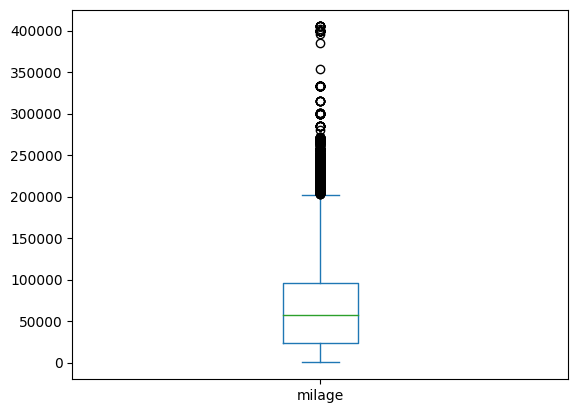

In [31]:
df['milage'].plot.box()

In [32]:
df[['model_year', 'milage']].corr()

,model_year,milage
model_year,1.000000,-0.651382
milage,-0.651382,1.000000


The `model_year` and a `milage` are negatively correlated meaning that older the car, higher the milage used.

#### Categorical Data

In [33]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     188533 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      188533 non-null  object
 10  clean_title   188533 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [35]:
# Check which columns contain the '–' value.

df.apply(lambda x: (x == '–').sum())

brand              0
model              0
model_year         0
milage             0
fuel_type          0
engine           925
transmission      87
ext_col          366
int_col         4527
accident           0
clean_title        0
price              0
dtype: int64

In [36]:
# Replace all the '–' values to NaN.

df.replace('–', np.nan, inplace=True) # *** Note to myself -> When building a pipeline make sure to do this initially to make things less complicated.

In [37]:
df.isna().sum() # Now all '–' value is NaN where we can work more easily.

brand              0
model              0
model_year         0
milage             0
fuel_type          0
engine           925
transmission      87
ext_col          366
int_col         4527
accident           0
clean_title        0
price              0
dtype: int64

In [38]:
# Since the exact color for both the exterior and interior of the car is unknown, we will mark it as ‘Unknown’.

df['ext_col'].fillna('Unknown', inplace=True)
df['int_col'].fillna('Unknown', inplace=True)

##### Transmission

In [39]:
df[df['transmission'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1539,Porsche,911 Carrera S Cabriolet,2007,28844,Gasoline,3.0 Liter,NaN,Red,Black,None reported,Unknown,107998
7815,Porsche,911 Carrera S,2019,36670,Gasoline,3.0 Liter,NaN,Red,Unknown,None reported,Unknown,85998
7838,Porsche,Macan S,2021,29136,Gasoline,3.0 Liter,NaN,Silver,Red,None reported,Unknown,77900
8967,INFINITI,G37 x,2018,9989,Gasoline,328.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,NaN,Black,Black,None reported,Yes,185950
9063,Volkswagen,Jetta GLX VR6,1993,1585,Gasoline,NaN,NaN,Arctic White,Gray,None reported,Unknown,142998
...,...,...,...,...,...,...,...,...,...,...,...,...
180050,Ford,Bronco,2022,11500,Gasoline,275.0HP 2.3L 4 Cylinder Engine Gasoline Fuel,NaN,Gray,Unknown,Unknown,Unknown,59000
182875,Ford,Bronco Raptor,2020,18051,Gasoline,NaN,NaN,Shadow Gray Metallic,Black/Gun Metal,At least 1 accident or damage reported,Yes,73897
184477,Porsche,911 Carrera 4S,2020,3099,Gasoline,3.0 Liter,NaN,Black,Red,None reported,Unknown,134999
184551,Porsche,911 Carrera S,2022,12758,Gasoline,3.0 Liter,NaN,Red,Unknown,None reported,Unknown,187900


In [40]:
def create_disctionary(data, group, column):
    mode = data.groupby(group)[column].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
    my_dict = mode.set_index(group)[column].to_dict()
    return my_dict

In [41]:
# Get the mode of the transmission by model.

mode_transmission = df.groupby('model')['transmission'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

mode_transmission['transmission'].unique()

array(['6-Speed M/T', '6-Speed A/T', 'A/T',
       'Transmission w/Dual Shift Mode', '8-Speed Automatic',
       '8-Speed A/T', '1-Speed A/T', 'Automatic', '5-Speed M/T',
       '5-Speed A/T', '7-Speed A/T', '7-Speed Automatic with Auto-Shift',
       '5-Speed Automatic', '9-Speed A/T', '9-Speed Automatic',
       'Automatic CVT', 'CVT Transmission', '4-Speed A/T',
       '10-Speed Automatic', '10-Speed A/T', 'M/T', '6-Speed Automatic',
       '8-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift', '2-Speed A/T',
       '1-Speed Automatic', 'Variable'], dtype=object)

In [42]:
transmission_dict = mode_transmission.set_index('model')['transmission'].to_dict()

transmission_dict

{'124 Spider Abarth': '6-Speed M/T',
 '128 i': '6-Speed A/T',
 '135 i': 'A/T',
 '135 is': 'Transmission w/Dual Shift Mode',
 '1500 Big Horn': '8-Speed Automatic',
 '1500 Cheyenne': 'A/T',
 '1500 Cheyenne Extended Cab': 'A/T',
 '1500 Classic SLT': '8-Speed Automatic',
 '1500 Classic Tradesman': '8-Speed A/T',
 '1500 Classic Warlock': '8-Speed Automatic',
 '1500 Laramie': '8-Speed Automatic',
 '1500 Limited': '8-Speed A/T',
 '1500 Longhorn': '8-Speed Automatic',
 '1500 Rebel': '8-Speed A/T',
 '1500 SLT': '8-Speed A/T',
 '1500 Sport': '8-Speed A/T',
 '1500 TRX': '8-Speed A/T',
 '1500 Tradesman/Express': '8-Speed A/T',
 '2 Launch Edition': '1-Speed A/T',
 '200 C': 'A/T',
 '200 Limited': 'A/T',
 '228 Gran Coupe i xDrive': 'Automatic',
 '228 i': '6-Speed M/T',
 '230 i': '8-Speed A/T',
 '240SX Base': '5-Speed M/T',
 '2500 Big Horn': '6-Speed A/T',
 '2500 Laramie': '6-Speed A/T',
 '2500 Longhorn': '6-Speed A/T',
 '2500 Powerwagon': '6-Speed A/T',
 '2500 SLT': '6-Speed A/T',
 '2500 Tradesman': 

In [43]:
# Fill in the missing values using the transmission dictionary.

df['transmission'] = df.apply(lambda row: transmission_dict[row['model']] if pd.isna(row['transmission']) else row['transmission'], axis=1)

##### Engine

In [44]:
df[df['engine'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
532,Dodge,Challenger R/T Scat Pack,2021,35000,Gasoline,NaN,8-Speed A/T,Blue,Gray,None reported,Yes,48000
1155,Ford,Mustang GT Premium,2017,143600,Gasoline,NaN,6-Speed M/T,White,Black,At least 1 accident or damage reported,Yes,31000
1307,Toyota,Land Cruiser Base,1994,138033,Gasoline,NaN,A/T,Green,Beige,None reported,Yes,11999
1362,Ford,Mustang EcoBoost Premium,2016,43000,Gasoline,NaN,A/T,Blue,Black,None reported,Yes,15500
1741,Chevrolet,Protege DX,1993,94200,Gasoline,NaN,A/T,Red,Gray,None reported,Yes,7599
...,...,...,...,...,...,...,...,...,...,...,...,...
187399,Mazda,MX-5 Miata Base,1993,90200,Gasoline,NaN,5-Speed M/T,Gray,Black,At least 1 accident or damage reported,Yes,11500
187664,Mercedes-Benz,SLS AMG Base,1993,14586,Gasoline,NaN,A/T,Red,Silver,None reported,Yes,65000
187820,Chrysler,Pacifica Touring,2017,57300,Gasoline,NaN,9-Speed A/T,Blue,Black,None reported,Yes,31700
187964,Mercedes-Benz,C-Class 4MATIC Sedan,1993,22703,Gasoline,NaN,A/T,Gray,Unknown,None reported,Yes,220000


In [45]:
# Do the same thing for the 'engine' column.

engine_dict = create_disctionary(df, 'model', 'engine')
df['engine'] = df.apply(lambda row: engine_dict[row['model']] if pd.isna(row['engine']) else row['engine'], axis=1)

In [46]:
df[df['engine'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
16319,Mercury,Capri XR2,1993,156193,Gasoline,None,5-Speed A/T,White,Unknown,None reported,Yes,10000
21264,Mercury,Capri XR2,2002,135000,Gasoline,None,4-Speed A/T,Green,Green,None reported,Yes,17999
57237,Mercury,Capri XR2,1999,120644,Gasoline,None,4-Speed A/T,Gray,Gray,None reported,Yes,16000
79744,Volvo,850 Turbo,2018,100600,Gasoline,None,8-Speed A/T,White,Gray,At least 1 accident or damage reported,Yes,48600
103091,Volvo,850 Turbo,1995,50000,Gasoline,None,6-Speed M/T,White,Unknown,None reported,Yes,33490
116033,Volvo,850 Turbo,1995,85095,Gasoline,None,A/T,Green,Gray,None reported,Yes,54000
130661,Volvo,850 Turbo,1995,7100,Gasoline,None,6-Speed M/T,Gold,Gray,None reported,Yes,37500
133861,Volvo,850 Turbo,1995,123000,Gasoline,None,A/T,Blue,Beige,At least 1 accident or damage reported,Yes,9995
138683,Mercury,Capri XR2,1994,120644,Gasoline,None,5-Speed M/T,Green,Gray,None reported,Yes,3900
163186,Mercury,Capri XR2,1993,120644,Gasoline,None,6-Speed M/T,Green,Gray,None reported,Yes,429998


In [47]:
df['engine'].fillna(df['engine'].mode()[0], inplace=True)

In [48]:
df.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

##### Model & Brand

In [49]:
df[df['model'].str.contains('911 Carrera')]['brand'].unique()

array(['Porsche', 'Hyundai', 'Toyota', 'Volvo', 'BMW', 'Ford',
       'Mercedes-Benz', 'Aston', 'Lincoln', 'Cadillac', 'Maserati', 'Kia',
       'Jaguar', 'Mazda', 'Genesis'], dtype=object)

In [50]:
df[(df['brand']=='BMW')&(df['model'].str.contains('911 Carrera'))]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
25618,BMW,911 Carrera 4,2016,11250,Gasoline,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,7-Speed A/T,Green,Black,None reported,Yes,15000


In [51]:
df[df['brand']=='Toyota']['model'].unique()

array(['Tundra SR5', 'Sequoia Limited', 'Tacoma PreRunner',
       '86 860 Special Edition', 'Camry SE', 'Highlander XLE',
       'Sequoia Platinum', 'Camry Solara SLE', '4Runner SR5', 'Camry LE',
       'Highlander Limited Platinum', 'Highlander Limited',
       'Camry Solara SLE V6', 'Highlander SE', '4Runner SR5 Premium',
       'Tundra Limited', 'Camry Hybrid Base', 'Avalon XLE',
       'Grand Cherokee L Laredo', 'Tundra SR5 Access Cab',
       'Land Cruiser Base', 'Tundra SR5 Double Cab', 'Tacoma Double Cab',
       'Matrix XR', 'Tacoma TRD Sport', 'C-HR LE', 'Camry Solara SE',
       'Sequoia SR5', 'Tacoma SR5', 'Highlander Hybrid Limited Platinum',
       '4Runner Trail', 'Camry Hybrid XLE', 'Tacoma SR',
       'Supra A91 Edition', 'GR86 Premium', 'FJ Cruiser Base',
       '911 Carrera 4 GTS', 'Tundra TRD Pro', 'Avalon Limited',
       'Sienna LE', 'Prius v Three', '86 Base', 'WRX Limited',
       'Camry XSE', 'Prius Two', 'Celica GT', 'Sequoia TRD Pro',
       'Accord EX-L', 'C

In [52]:
df[(df['brand']=='Toyota')&(df['model']=='Ram 2500 ST')]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
171918,Toyota,Ram 2500 ST,2007,106731,Gasoline,210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,A/T,Red,Gray,At least 1 accident or damage reported,Yes,10750


In [53]:
df[df['model']=='Ram 2500 ST']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1926,Dodge,Ram 2500 ST,2006,190656,Gasoline,330.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Gray,None reported,Yes,11500
7324,Dodge,Ram 2500 ST,2011,164500,Gasoline,355.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,White,Gray,None reported,Yes,16500
8325,Dodge,Ram 2500 ST,2011,151896,Gasoline,328.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Gray,At least 1 accident or damage reported,Yes,14000
10430,Dodge,Ram 2500 ST,2008,110000,Gasoline,310.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Gray,None reported,Yes,18300
15829,Dodge,Ram 2500 ST,2006,151400,Gasoline,345.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,White,Gray,At least 1 accident or damage reported,Yes,10995
21305,Dodge,Ram 2500 ST,2014,67800,Diesel,250.0HP 5.9L Straight 6 Cylinder Engine Diesel...,5-Speed A/T,Gray,Black,At least 1 accident or damage reported,Yes,6600
22037,Dodge,Ram 2500 ST,2008,185000,Gasoline,355.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,Red,Gray,At least 1 accident or damage reported,Yes,3990
22278,Dodge,Ram 2500 ST,2013,131100,E85 Flex Fuel,350.0HP 6.7L Straight 6 Cylinder Engine Diesel...,5-Speed A/T,White,Gray,At least 1 accident or damage reported,Yes,22500
28735,Dodge,Ram 2500 ST,2007,190000,Gasoline,210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Black,Gray,None reported,Yes,15900
28757,Dodge,Ram 2500 ST,2004,170000,Gasoline,210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Gray,None reported,Yes,6500


In [54]:
df['brand'].value_counts()

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren            243
Aston              238
Satur

After checking the brand and model, it seems like model is more accurate then brand, for instance there was only one Mercielago with the brand as Nissan and only one Ram 2500 ST with the brand Toyota. Therefore, I will grouped the model and use the mode of the brand so that all the brand values are close to correct.

In [55]:
# Correct the brand by model.

brand_dict = create_disctionary(df, 'model', 'brand')
df['brand'] = df['model'].map(brand_dict)

In [56]:
df[df['model'].str.contains('911 Carrera')]['brand'].unique()

array(['Porsche'], dtype=object)

In [57]:
df[df['model'].str.contains('Ram 2500 ST')]['brand'].unique()

array(['Dodge'], dtype=object)

In [58]:
df[df['model'].str.contains('R1S')]['brand'].unique()

array(['Rivian'], dtype=object)

Now the model and brand shows correctly. Finally we are ready to feature engineering.

## Feature Engineering

In [89]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Age,hp,engine_liter,cylinder
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,17,172.0HP,1.6L,4 Cylinder
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,22,252.0HP,3.9L,8 Cylinder
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,22,320.0HP,5.3L,8 Cylinder
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,7,420.0HP,5.0L,8 Cylinder
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,3,208.0HP,2.0L,4 Cylinder


In [61]:
# Create the 'age' feature using the 'model_year'.
df['age'] = datetime.now().year - df['model_year']

In [65]:
df['engine'].unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel',
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

In [106]:
def extract_horsepower(hp):
    try:
        pattern = r'\d+\.\d+HP'
        match = re.search(pattern, hp)
        hp_string = match.group()
        horsepower = hp_string.replace('.0HP', '')
        horsepower = int(horsepower)
        return horsepower
    except:
        return np.nan

In [107]:
def extract_engine_liter(liter):
    try:
        pattern = r'\d+\.\d+L'
        match = re.search(pattern, liter)
        liter_string = match.group()
        liter = liter_string.replace('L', '')
        liter = float(liter)
        return liter
    except:
        return np.nan

In [108]:
def extract_cylinder(cyn):
    try:
        pattern = r'\d+ Cylinder'
        match = re.search(pattern, cyn)
        cyn_string = match.group()
        cylinder = cyn_string.replace(' Cylinder', '')
        cylinder = int(cylinder)
        return cylinder
    except:
        return np.nan

In [109]:
# Create a 'horsepower', 'engine_liter', 'cylinder' features using the 'engine'.
df['hp'] = df['engine'].apply(extract_horsepower)
df['engine_liter'] = df['engine'].apply(extract_engine_liter)
df['cylinder'] = df['engine'].apply(extract_cylinder)

In [110]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Age,hp,engine_liter,cylinder
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,17,172.0,1.6,4.0
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,22,252.0,3.9,8.0
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,22,320.0,5.3,8.0
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,7,420.0,5.0,8.0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,3,208.0,2.0,4.0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         188533 non-null  object 
 1   model         188533 non-null  object 
 2   model_year    188533 non-null  int64  
 3   milage        188533 non-null  int64  
 4   fuel_type     188533 non-null  object 
 5   engine        188533 non-null  object 
 6   transmission  188533 non-null  object 
 7   ext_col       188533 non-null  object 
 8   int_col       188533 non-null  object 
 9   accident      188533 non-null  object 
 10  clean_title   188533 non-null  object 
 11  price         188533 non-null  int64  
 12  Age           188533 non-null  int64  
 13  hp            156050 non-null  float64
 14  engine_liter  175232 non-null  float64
 15  cylinder      151450 non-null  float64
dtypes: float64(3), int64(4), object(9)
memory usage: 23.0+ MB


In [ ]:
for 